**Gaussian Discriminative Analysis (GDA)**

**Setup and Preliminaries**
<br><br>
(1) Import the necessary libraries <br>
(2) Get the dataset from the CSV files

In [1]:
# (1) Import the necessary libraries
import numpy as np
import pandas as pd
from pathlib import Path

# (2) Get the dataset from the .dat files (relative to the ASSIGNMENT1 folder)
# Get the absolute path of the ASSIGNMENT1 folder (i.e. the parent folder)
parent_folder = Path.cwd().parent  # Moves up from Q4 to ASSIGNMENT1

# Define the data folder relative to ASSIGNMENT1
data_folder = parent_folder / "data" / "Q4"

# Define file paths for q4x.dat and q4y.dat (case-sensitive filenames)
x_file = data_folder / "q4x.dat"
y_file = data_folder / "q4y.dat"

# Check if files exist before proceeding
if not x_file.exists() or not y_file.exists():
    raise FileNotFoundError(f"One or both data files are missing in {data_folder}!")

# Load the datasets - handling .dat format correctly
X = pd.read_csv(x_file, sep=r'\s+', header=None).values  
y = pd.read_csv(y_file, sep=r'\s+', header=None).values.ravel() 

# Using map to map Alaska and Canada to 0 and 1 respectively
mapping = {'Alaska': 0, 'Canada': 1}
y = np.array([mapping[val] for val in y]) # Convert to numpy array 

# Display the shape for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 2)
Shape of y: (100,)


**NOTE :** Since the gda model only involves closed-form calculations, we are not splitting the given data into train-test. Also, the given data is very small (m = 100)

**1 &emsp; GDA assuming both classes have same covariance matrix**

In [2]:
from gda import GaussianDiscriminantAnalysis

gda_same_cov = GaussianDiscriminantAnalysis() # Create an instance of the GDA model with same covariance
mu_0, mu_1, sigma = gda_same_cov.fit(X, y, True) # Fit the model to the data

# Report the parameters
print("Shared Covariance Model:")
print("mu_0:", mu_0)
print("mu_1:", mu_1)
print("sigma:\n", sigma)

Shared Covariance Model:
mu_0: [-0.75529433  0.68509431]
mu_1: [ 0.75529433 -0.68509431]
sigma:
 [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


**2 &emsp; Plot the given data**

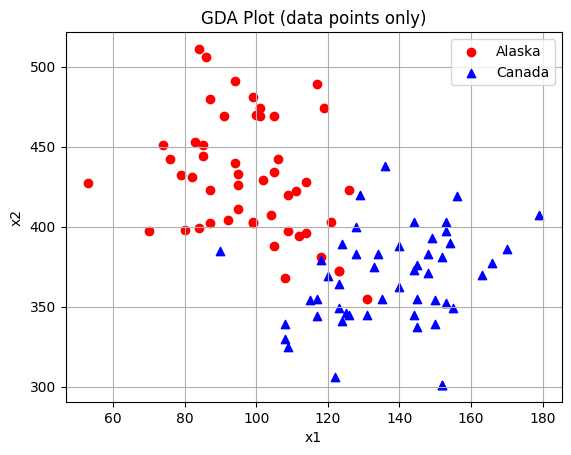

In [3]:
import matplotlib.pyplot as plt

# Separate data points by class
alaska_points = X[y == 0]  # Points where y is 0
canada_points = X[y == 1]  # Points where y is 1

# Plot each class with a single scatter call
plt.scatter(alaska_points[:, 0], alaska_points[:, 1], 
           marker='o', color='red', label='Alaska')
plt.scatter(canada_points[:, 0], canada_points[:, 1], 
           marker='^', color='blue', label='Canada')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("GDA Plot (data points only)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

**3 &emsp; The decision boundary equation and plot for GDA with same covariance matrix**

Decision Boundary Equation(for normalized features): 3.389x₁ + -2.439x₂ + 0.000 = 0


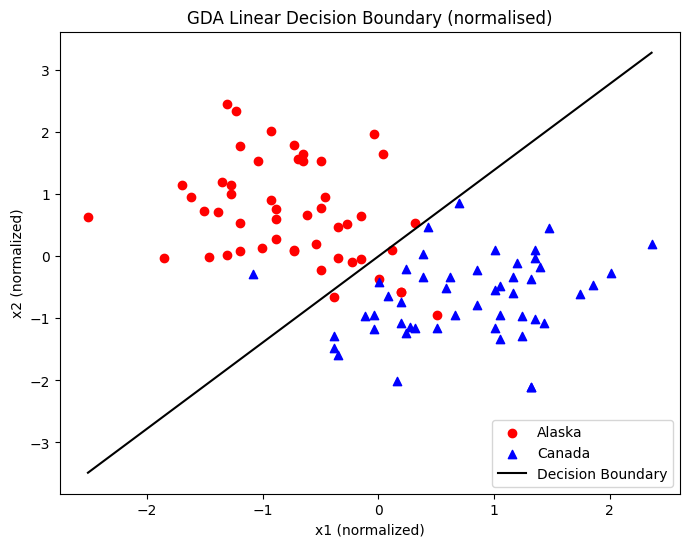

In [4]:
# Calculates the decision boundary equation for the normalized data
boundary = gda_same_cov.db_s()
w = boundary['w']
b = boundary['b']
equation = f"{w[0]:.3f}x₁ + {w[1]:.3f}x₂ + {b:.3f} = 0"
print("Decision Boundary Equation(for normalized features):", equation)

gda_same_cov.plot_linear_decision_boundary(X,y)

**4 &emsp; GDA assuming both classes have different covariance matrix**

In [5]:
from gda import GaussianDiscriminantAnalysis

gda_diff_cov = GaussianDiscriminantAnalysis() # Create an instance of the GDA model with same covariance
mu_0, mu_1, sigma_0, sigma_1 = gda_diff_cov.fit(X, y, False) # Fit the model to the data

# Report the parameters
print("Difference Covariance Model:")
print("mu_0:", mu_0)
print("mu_1:", mu_1)
print("sigma_0:", sigma_0)
print("sigma_1:", sigma_1)

Difference Covariance Model:
mu_0: [-0.75529433  0.68509431]
mu_1: [ 0.75529433 -0.68509431]
sigma_0: [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
sigma_1: [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


**5(a) &emsp; The decision boundary equation and plot for GDA with different covariance matrix**

Quadratic Decision Boundary Equation: 0.336 x₁² + -0.433 x₂² + 1.287 x₁x₂ + 3.808 x₁ + -2.860 x₂ + -0.585 = 0


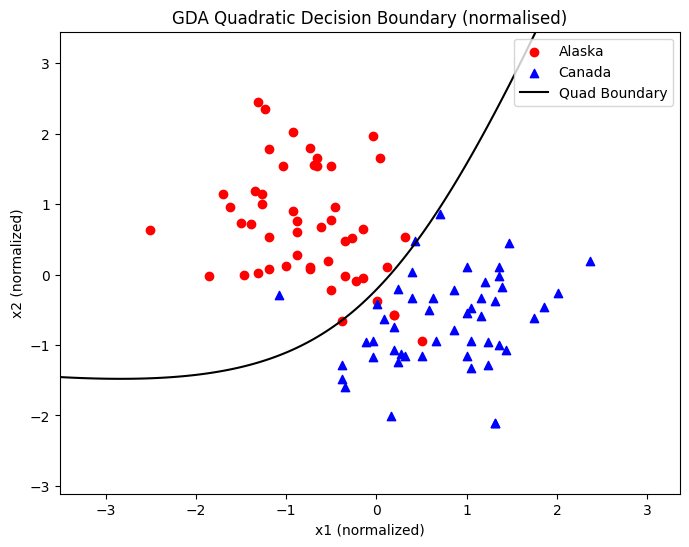

In [6]:
boundary = gda_diff_cov.db_d()
boundary_eqn = gda_diff_cov.quadratic_boundary_equation()  

print("Quadratic Decision Boundary Equation:", boundary_eqn)
gda_diff_cov.plot_quadratic_decision_boundary(X,y)

**5(b) &emsp; All the plots together**

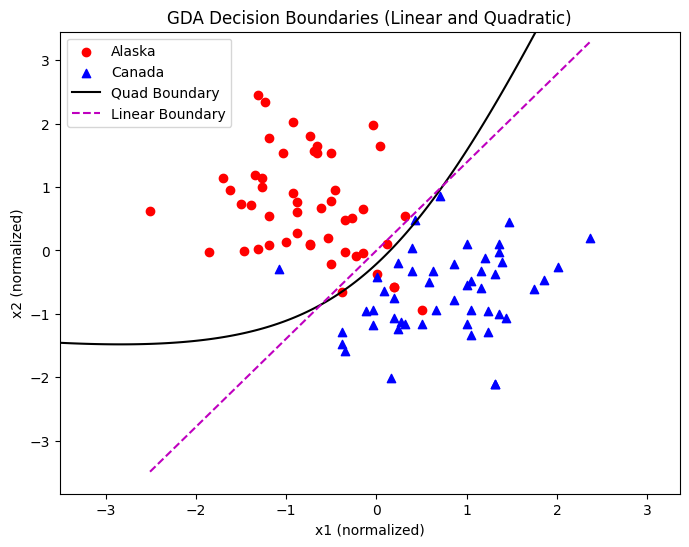

In [7]:
import matplotlib.pyplot as plt
from numpy.linalg import inv, det

plt.figure(figsize=(8, 6))
X = gda_same_cov._normalize_features(X)

# Scatter plot of data (common to both plots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', color='red', label='Alaska')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='^', color='blue', label='Canada')

# --- Quadratic Boundary ---
sigma_0_inv = inv(gda_diff_cov.sigma_0_d)
sigma_1_inv = inv(gda_diff_cov.sigma_1_d)

A = 0.5 * (sigma_0_inv - sigma_1_inv)
B = (gda_diff_cov.mu_1_d.T @ sigma_1_inv - gda_diff_cov.mu_0_d.T @ sigma_0_inv)
C = (0.5 * (gda_diff_cov.mu_0_d.T @ sigma_0_inv @ gda_diff_cov.mu_0_d -
            gda_diff_cov.mu_1_d.T @ sigma_1_inv @ gda_diff_cov.mu_1_d) +
    0.5 * np.log(det(gda_diff_cov.sigma_0_d) / det(gda_diff_cov.sigma_1_d)) +
    np.log((1 - gda_diff_cov.phi) / gda_diff_cov.phi))

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                    np.arange(x2_min, x2_max, 0.01))
Z = np.zeros_like(xx1)

xx = np.c_[xx1.ravel(), xx2.ravel()]
Z = A[0, 0] * xx[:, 0]**2 + 2 * A[0, 1] * xx[:, 0] * xx[:, 1] + A[1, 1] * xx[:, 1]**2 + B[0] * xx[:, 0] + B[1] * xx[:, 1] + C
Z = Z.reshape(xx1.shape)

contour = plt.contour(xx1, xx2, Z, [0], colors='k', linestyles='solid')
plt.plot([], [], 'k', label='Quad Boundary')  # Manually adding to legend

# --- Linear Boundary ---
boundary = gda_same_cov.decision_boundary()  # Assuming this returns {'type': 'linear', 'w': w, 'b': b}

if boundary['type'] == 'linear':
    w = boundary['w']
    b = boundary['b']
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = (-b - w[0] * x_vals) / w[1]
    plt.plot(x_vals, y_vals, 'm--', label='Linear Boundary') # Different color and linestyle


plt.xlabel("x1 (normalized)")
plt.ylabel("x2 (normalized)")
plt.legend(loc="best")
plt.title("GDA Decision Boundaries (Linear and Quadratic)")
plt.show()